<a href="https://colab.research.google.com/github/zhi-yu-lin/data-and-python/blob/main/Final_project_zyLin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce sales Analysis



`By Zhiyu Lin 07/09/2023`



<font size=4>
This dataset provides an overview of e-commerce sales data from Amazon channel for clothing in India. Analyzing the general sales trends by examining info such as income, category and customers' size for each sale. This will give people an idea about how the e-commerce business is performing in Amazon and profitability of e-commerce sales

## The dataset
_reference and link to the source of the data_

---



In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

df = pd.read_csv('drive/MyDrive/Amazon Sale Report.csv')

<ipython-input-37-004a17652d34>:7: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/Amazon Sale Report.csv')


* description of the dataset (number of records, statistics, columns, etc)
* description of the processing with code in the box below to show summary information about the data


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [38]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

## Cleaning the data
_what will you do to get the data ready for analysis_
* sorting
* removing null data
* forming new data tables
* ...
---


In [39]:
# Remove redundant index
df.drop('index', axis = 1, inplace = True)

# Removing null column
df.drop('Unnamed: 22', axis = 1, inplace = True)

# Removing redundant column
df.drop('Courier Status', axis = 1, inplace = True)

# Replace values in Status
df.replace('Shipped - Delivered to Buyer', 'Shipped')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [40]:
# Convert dates to date format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df.sort_values(by='Date', ascending = True, ignore_index=True, inplace=True)

In [41]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,404-1445673-1345134,2022-03-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3724,JNE3724-KR-L,kurta,L,...,1,INR,495.00,KOLKATA,WEST BENGAL,700124.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
1,406-7387241-2881923,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET187,SET187-KR-DH-XL,Set,XL,...,1,INR,599.00,BENGALURU,KARNATAKA,560090.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
2,402-9332104-0945115,2022-03-31,Cancelled,Merchant,Amazon.in,Standard,JNE3383,JNE3383-KR-A-M,kurta,M,...,0,INR,416.19,GURGAON,HARYANA,122001.0,IN,NaN,False,Easy Ship
3,408-1008226-2450750,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,L,...,1,INR,449.00,Nalasopara east,MAHARASHTRA,401209.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
4,403-4108307-0229121,2022-03-31,Shipped,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-L,Set,L,...,1,INR,542.00,HYDERABAD,TELANGANA,500024.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


## Analysing the data
_what analysis are you doing and why_
* producing summary statistics
* printing calculated statistics
* data analysis calculations (e.g. regression, correlation)
* ...

---



In [42]:
# Calculate the daily income
series_dailyincome = df.groupby('Date')['Amount'].sum()
series_dailyincome.head()

Date
2022-03-31     101683.85
2022-04-01     865478.60
2022-04-02     913101.53
2022-04-03    1011763.38
2022-04-04     882059.17
Name: Amount, dtype: float64

In [43]:
# Find out popolar items
SKU_count = df['SKU'].value_counts()
pop_sku = SKU_count[SKU_count >= 100]
pop_sku.head(10)

JNE3797-KR-L      773
JNE3797-KR-M      657
JNE3797-KR-S      587
JNE3405-KR-L      535
J0230-SKD-M       507
JNE3797-KR-XL     474
J0230-SKD-S       452
JNE3405-KR-S      443
JNE3797-KR-XS     431
JNE3797-KR-XXL    395
Name: SKU, dtype: int64

In [44]:
# Find out the most popolar item
print(SKU_count.idxmax(), SKU_count.max())

JNE3797-KR-L 773


<font color=#0029ff size=3.5>
By analyzing SKU, there are some items that are popular in the e-shop, especially JNE3797-KR-L. Therefore, e-retailers are supposed to enlarge their stocks and think over the reasons why they are popular.

## Visualising the data
_graphical or textual visualisation of the data_

---



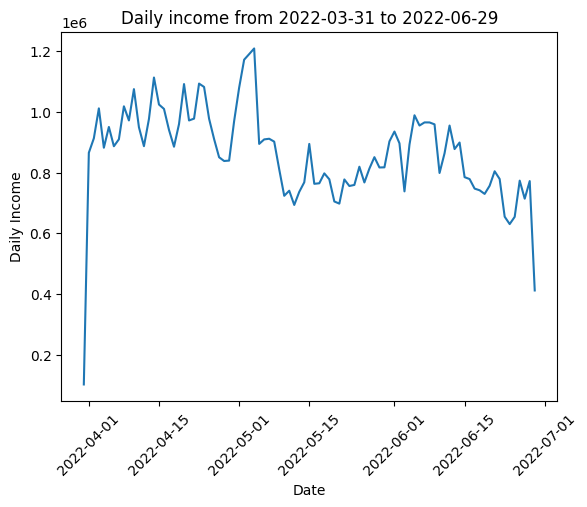

In [45]:
# Analyze the monthly income
plt.plot(series_dailyincome.index, series_dailyincome.values)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Daily Income')
plt.title('Daily income from %s to %s' % (series_dailyincome.index[0].date(), series_dailyincome.index[-1].date()))
plt.show()

<font color=#0029ff size=3.5>
It is clear that the daily income varies significantly from day to day. On 4 May, the daily income achieved the highest point. The average daily income after that day is lower than that before 4 May.
It is worth to notice that there is a sharp increase on 1 April. The reasons may be that 31 March is the day to open the e-shop or the lack of data.

In [46]:
series_size = df['Size'].value_counts()
series_size.index

Index(['M', 'L', 'XL', 'XXL', 'S', '3XL', 'XS', '6XL', '5XL', '4XL', 'Free'], dtype='object')

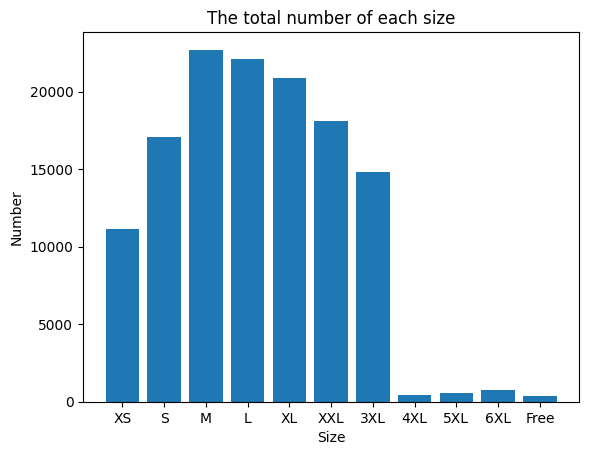

In [47]:
# Analyzing the size of ppl
custom_order = ['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL', 'Free']
series_size = series_size.reindex(custom_order)

plt.xlabel('Size')
plt.ylabel('Number')
plt.title('The total number of each size')
plt.bar(series_size.index, series_size.values)

plt.show()


<font color=#0029ff size=3.5>
When analyzing the size of clothing people purchase, we can find out that the scale is similar to normal distribution but fat tail on the right side. M is the most common size for Indian women so the suppliers should consider more stock in M size to XXL size.

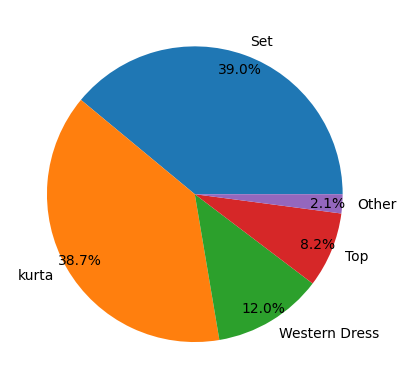

In [48]:
# Analyze the category clothing sold
category_count = df['Category'].value_counts()

threshold = 1500
other_sizes = category_count[category_count < threshold].sum()
category_count = category_count[category_count >= threshold]
category_count['Other'] = other_sizes

plt.pie(category_count.values, labels=category_count.index, radius=1, pctdistance=0.9, autopct='%1.1f%%')
plt.show()

<font color=#0029ff size=3.5>
When analyzing the category sold, it is clear that Set and Kurta are the most popular items. This means traditional Indian clothing still takes the most important role in people's wearing. And people are used to buying them online.

# Summary

On summary, the daily income varies significantly from day to day. However, the performance is worse after 4 May hence retailors are supposed to consider reasons.

To better the sales, retailors need to consider the popular sizes, categories, and items to make sure to attarct customers. Overall, india customers prefer Set and Kurta, and they wear M to XXL mostly.

Data source: https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data